In [4]:
%matplotlib notebook
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
import scipy.stats; print(scipy.stats.norm.cdf(2.0))

0.9772498680518208


In [5]:
df = pd.read_csv("./HospitalAdmissionsData.csv")
type(df)
df.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [6]:
#What are the column headers or features in this data set?
df.head()
# they are ID, AdmissionLengthDays, Dead or alive, Admission Type, Insurance Type, if they speak english or not, 
#Religion Type, married or not, race, diagnosis

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [7]:
#How many features are floats? How many are integers? Which features are objects (non-numeric variables)?
df.info()
# there are 1 feature that is floats, and 4 are integers
#Admission_Type,Insurance_Type,Religion_Type,Race and Dx are objects



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [8]:
#What are the possible 'values' for insurance type?
df["Insurance_Type"].unique()

# possible values are 'private', 'medicare', 'government', 'medicaid', 'self pay'

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [9]:
#Show the summary statistics for the admission length.
df["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [10]:
#What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?



df.filter(["Admission_Type", "Insurance_Type", "Religion_Type","Race", "Dx"]).mode()

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
0,emergency,medicare,catholic,white,newborn


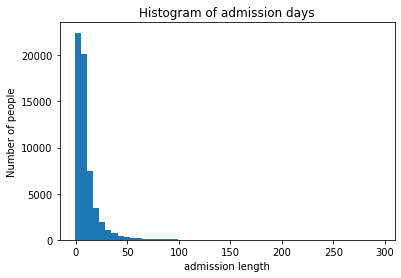

In [34]:
#Show a histogram for admission days (with appropriate labels, titles, etc)
plt.hist(df["AdmissionLengthDays"],50, rwidth= 1.5)

plt.xlabel('admission length')
plt.ylabel('Number of people')
plt.title('Histogram of admission days')

plt.show()

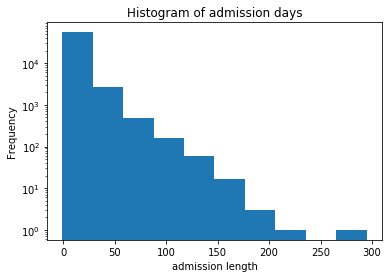

In [35]:
#and also show a histogram for admission days on a log scale. Describe what you see.

plt.xlabel('admission length')
plt.ylabel('Number of people')
plt.title('Histogram of admission days')



df["AdmissionLengthDays"].plot.hist(bins = 10)
plt.yscale("log")


plt.show()

#it is a lot more clear to see the difference between each category compare to before. 


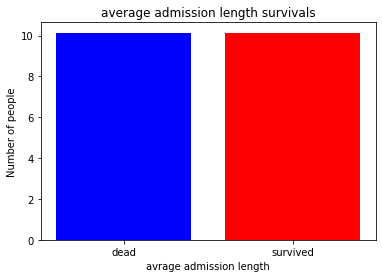

In [70]:
#Compare the average length of admission between those who died versus those who did not die. 
#Show a visualization, with appropriate labels, titles, etc.


#print(df.loc[df['A'] == 'foo'])

plt.xlabel('avrage admission length')
plt.ylabel('Number of people')
plt.title('average admission length survivals')


dkm = df["AdmissionLengthDays"][(df["Death_1"]==1)].mean()
alm = df["AdmissionLengthDays"][(df["Death_1"]==0)].mean()
#dkm.mean()

plt.bar([0,1],[dkm, alm], color=['b','r'])

x = ['dead', 'survived']

x_pos = [i for i, _ in enumerate(x)]
plt.xticks(x_pos, x)

#plt.xticks(np.arange(0, 2, step=1))

plt.show()







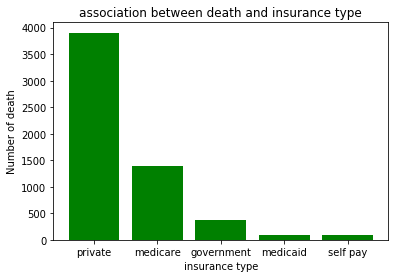

In [76]:
#Describe the association between death and insurance type and show a visualization or test

plt.xlabel('insurance type')
plt.ylabel('Number of death')
plt.title('association between death and insurance type')

x = ['private', 'medicare', 'government', 'medicaid', 'self pay']
pri = df["Insurance_Type"][(df["Death_1"]==1)].value_counts()
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, pri, color='green')

plt.xticks(x_pos, x)
plt.show()



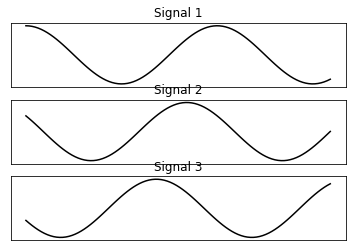

In [33]:
#Recreate this figure:

x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

fig, axes = plt.subplots(nrows=3)

for ax, y, name in zip(axes, [y1, y2, y3], names):
    ax.plot(x, y, color='black')
    ax.set(xticks=[], yticks=[], title=name)

plt.show()
